<h1><center> <font color='brown'> BDAT 1004 – Data Programming</font></center></h1>
<h2><center> Problem Set 3</center></h2>
<h2><center> Prepared by Arsha Unnithan (200546119)</center></h2>

<h3><font color='darkblue'>Question 1 - Occupations </h3>

<i>Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np

<i>Step 2. Import the dataset from this address.

In [7]:
data = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

<i>Step 3. Assign it to a variable called users.

In [8]:
users = pd.read_csv(data, sep='|', index_col='user_id')
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


<i>Step 4. Discover what is the mean age per occupation 

In [9]:
 users[["occupation","age"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


<i> Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [20]:
users_df = pd.DataFrame(users)

gender_counts = users_df.pivot_table(index='occupation', columns='gender', values='age', aggfunc='size', fill_value=0)

total_counts = gender_counts[['F', 'M']].sum(axis=1)

result['male_ratio'] = gender_counts['M'] / total_counts * 100

result.sort_values('male_ratio',axis=0,ascending=False)

,male_ratio
occupation,
doctor,100.000000
engineer,97.014925
technician,96.296296
retired,92.857143
programmer,90.909091
executive,90.625000
scientist,90.322581
entertainment,88.888889
lawyer,83.333333


<i>Step 6. For each occupation, calculate the minimum and maximum ages

In [11]:
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


<i>Step 7: For each combination of occupation and sex, calculate the mean age

In [71]:
pd.pivot_table(users,index=['occupation'], columns= ['gender'], values = 'age',   aggfunc={'age' : np.mean}).fillna(0)

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


<i>Step 8. For each occupation present the percentage of women and men

In [95]:
percentage = pd.pivot_table(users, index=['occupation'], columns=['gender'], values='age', aggfunc='count').fillna(0)
percentage['Male'] = (percentage['M'] / (percentage['F'] + percentage['M']) * 100)
percentage['Female'] = (percentage['F'] / (percentage['F'] + percentage['M']) * 100)
percentage.iloc[:, [2, 3]]

gender,Male,Female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 2 - Euro Teams </h3>

<i>Step 1. Import the necessary libraries
    
<i>Step 2. Import the dataset from this address

In [101]:
data = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

<i>Step 3. Assign it to a variable called euro12

In [106]:
euro12 = pd.read_csv(data)
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


<i>Step 4. Select only the Goal column:

In [111]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


<i>Step 5. How many team participated in the Euro2012?

In [115]:
teams_count = euro12['Team'].count()
print("Number of teams participated :", teams_count)

Number of teams participated : 16


<i>Step 6. What is the number of columns in the dataset?

In [116]:
columns_count = len(euro12.columns)
print("Number of columns in the dataset:", columns_count)

Number of columns in the dataset: 35


<i>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline.

In [130]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


<i>Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [140]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[True, True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


<i>Step 9. Calculate the mean Yellow Cards given per Team

In [139]:
euro12.groupby('Team').agg({'Yellow Cards': 'mean'})

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


<i> Step 10. Filter teams that scored more than 6 goals

In [142]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


<i>Step 11. Select the teams that start with G

In [144]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


<i>Step 12. Select the first 7 columns

In [145]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


<i>Step 13. Select all columns except the last 3

In [146]:
euro12.iloc[:, :-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


<i>Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [147]:
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 3 - Housing </h3>

<i> Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:     
<i> • The first a random number from 1 to 4 
    • The second a random number from 1 to 3 
    • The third a random number from 10,000 to 30,000  

In [160]:
series_1 = pd.Series(np.random.randint(1, 5, 100))
series_2 = pd.Series(np.random.randint(1, 4, 100))
series_3 = pd.Series(np.random.randint(10000, 30001, 100))

<i>Step 3. Create a DataFrame by joining the Series by column

In [172]:
df = pd.concat([series_1, series_2, series_3], axis=1)
df

,0,1,2
0,2,1,23906
1,3,2,28470
2,1,3,13648
3,4,2,28144
4,1,3,12582
...,...,...,...
95,2,3,18554
96,3,2,20323
97,2,1,28497
98,1,2,13146


<i>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [176]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,1,23906
1,3,2,28470
2,1,3,13648
3,4,2,28144
4,1,3,12582
...,...,...,...
95,2,3,18554
96,3,2,20323
97,2,1,28497
98,1,2,13146


<i>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [183]:
bigcolumn = pd.concat([series_1, series_2, series3], axis=0, ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
bigcolumn

,0
0,2
1,3
2,1
3,4
4,1
...,...
295,14668
296,13756
297,26576
298,14526


<i>Step 6. Ops it seems it is going only until index 99. Is it true?

In [184]:
print(bigcolumn.index)

RangeIndex(start=0, stop=300, step=1)


<i>Step 7. Reindex the DataFrame so it goes from 0 to 299

In [190]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index = pd.RangeIndex(start=0, stop=300, step=1)
bigcolumn

,0
0,2
1,3
2,1
3,4
4,1
...,...
295,14668
296,13756
297,26576
298,14526


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 4 - Wind Statistics </h3>

<i>Step 1. Import the necessary libraries

In [191]:
import pandas as pd
import numpy as np
import csv
import datetime

<i>Step 2. Import the dataset from the attached file wind.txt

In [194]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


<i>Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [195]:
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


<i>Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [199]:
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)
    
data.index = data.index.map(fix_year)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


<i>Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
   

In [200]:
data.index = pd.to_datetime(data.index)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


<i>Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [236]:
print (f'Missing values in each location is')
data.isna().sum()

Missing values in each location is


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

<i>Step 7. Compute how many non-missing values there are in total.

In [237]:
print (f'Non-missing values in each location is')
data.notnull().sum()

Non-missing values in each location is


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [238]:
print (f'Total number of non-missing values is', data.notnull().sum().sum())

Total number of non-missing values is 78857


<i>Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [239]:
mean_wind_speed = data.mean().mean()
print (f"The mean windspeeds of the windspeeds over all the locations and all the times is ", mean_wind_speed)

The mean windspeeds of the windspeeds over all the locations and all the times is  10.227982360836924


<i>Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. 

In [240]:
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


<i> Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. 

In [241]:
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


<i>Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. 

In [242]:
january_data = data[data.index.month == 1]
january_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

<i>Step 12. Downsample the record to a yearly frequency for each location. 

In [243]:
yearly_data = data.resample('Y').mean()
yearly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


<i>Step 13. Downsample the record to a monthly frequency for each location.

In [244]:
monthly_data = data.resample('M').mean()
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


<i>Step 14. Downsample the record to a weekly frequency for each location. 

In [245]:
weekly_data = data.resample('W').mean()
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


<i>Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [255]:
week_stats = data.resample('W', closed='left', label='left').agg(['min', 'max', 'mean', 'std'])[:52*7]
week_stats = week_stats.iloc[1:53]
week_stats

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08   9.04  19.75  12.314286  3.600240   3.54  12.08   8.978571   
1961-01-15   4.92  19.83  13.554286  5.137479   3.42  14.37  10.404286   
1961-01-22   9.59  25.04  18.410000  5.736381   5.88  20.79  13.565714   
1961-01-29  10.58  24.21  15.965000  5.181613   9.46  24.21  16.482857   
1961-02-05  16.79  24.54  20.541429  3.262777  11.54  21.42  16.392857   
1961-02-12   6.04  22.50  15.105714  5.059196  11.63  20.17  15.281429   
1961-02-19   7.79  22.08  13.845714  5.346154   7.08  17.46  12.781429   
1961-02-26  10.96  25.80  14.180000  5.206653   8.83  21.50  13.594286   
1961-03-05   4.88  14.79   9.644286  3.479870   8.08  17.00  12.024286   
1961-03-12   4.92  16.88  11.993333  4.221790  11.34  15.54  14.132857   
1961-03-19   6.29  13.75   9.055714  2.898901   2.58  11.63   8.077143   
1961-03-26   5.88  18.25  11.811429  5.053185   3.50  16.29   9.907143   
1961-04-02   4.50  18.12  11.142857  4.819684   4.25  14.62   9.672857   
1961-04-09   5.17  15.50  10.202857  3.732898   4.83  12.25   8.588571   
1961-04-16   4.00  21.09  11.550000  6.425628   3.71  15.41  10.314286   
1961-04-23   4.08  16.29  10.194286  4.386425   6.50  14.46   9.351429   
1961-04-30   9.87  23.00  14.440000  5.023047  10.29  19.79  13.011429   
1961-05-07   3.54  18.16   9.045714  5.205004   3.96  17.71  10.308571   
1961-05-14   4.88  15.04   8.571429  3.591687   3.58  10.17   6.006667   
1961-05-21   4.96  11.79   7.708571  2.649827   3.67  12.50   6.905714   
1961-05-28   7.00  15.92  10.530000  3.004369   4.75   9.79   7.585714   
1961-06-04   8.33  14.42  10.947143  2.208753   6.42  11.54   8.934286   
1961-06-11   6.13  14.33  10.024286  3.029113   4.12  14.54   9.214286   
1961-06-18   4.00  12.12   7.791429  2.653215   3.25   9.50   6.257143   
1961-06-25   7.21  13.13   9.730000  2.426940   6.34  14.37   9.625714   
1961-07-02   8.00  17.50  12.394286  3.105961   3.75  10.75   7.440000   
1961-07-09   7.29  22.50  14.661429  5.736949   5.71  19.29  12.780000   
1961-07-16   3.33  21.42   6.828571  6.498804   2.92  10.88   5.280000   
1961-07-23   3.04  16.08  10.120000  4.818129   3.71  13.79   7.488571   
1961-07-30   6.13  16.08  10.548571  3.361316   5.09  15.79   9.321429   
1961-08-06   2.88  14.21   9.295000  4.211493   4.42  10.00   7.595714   
1961-08-13  12.96  18.91  15.494286  2.406906   7.25  12.87   9.924286   
1961-08-20   7.67  18.16  12.748571  3.387258   6.87  14.58  11.434286   
1961-08-27   3.63  14.46   8.624286  4.358279   1.13  22.00   9.721429   
1961-09-03   5.75  17.62  11.488571  4.598777   3.04  13.59   8.584286   
1961-09-10   5.00  28.75  17.112857  7.764459   8.42  22.08  14.678571   
1961-09-17   5.33  10.25   8.118571  1.752060   2.92  13.62   7.308571   
1961-09-24   8.00  23.21  15.151429  5.487089   6.04  13.62  10.223333   
1961-10-01   3.13  16.08  11.090000  5.473960   3.63  16.96   8.900000   
1961-10-08   3.71  17.12  12.145000  4.801769   6.13  13.25  10.448571   
1961-10-15   7.79  28.62  16.795714  8.455733   3.75  19.46  11.648571   
1961-10-22   6.50  26.42  19.035714  6.595571   3.29  21.25  14.171429   
1961-10-29   4.33  15.79  10.285714  4.200860   2.75  13.46   8.227143   
1961-11-05   5.46  16.08  10.214286  3.693620   5.50  12.29   8.035714   
1961-11-12   7.50  15.00  11.280000  3.180891   4.21  13.00   8.272857   
1961-11-19   5.75  14.29   9.898571  3.027559   3.29  11.79   6.991429   
1961-11-26   6.25  23.75  11.537143  6.142100   4.67  18.71  10.430000   
1961-12-03  10.83  22.83  15.940000  4.124649   9.21  17.00  12.757143   
1961-12-10   9.29  23.71  16.491429  5.124540   8.63  21.37  15.221429   
1961-12-17  11.46  24.41  14.704286  4.539654   9.13  16.13  11.347143   
1961-12-24   5.04  20.54  15.158571  6.031107   3.08  16.04  10.314286   
1961-12-31   3.17 

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 5 - Chipotle </h3>

<i>Step 1. Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np

<i>Step 2. Import the dataset from this address

In [12]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

<i>Step 3. Assign it to a variable called chipo. 

In [13]:
chipo = pd.read_csv(url, delimiter='\t')

<i>Step 4. See the first 10 entries 

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<i>Step 5. What is the number of observations in the dataset?

In [8]:
#The rows represent the observations and the columns represent the variables. 
print(len(chipo.index))

4622


<i>Step 6. What is the number of columns in the dataset?

In [9]:
#The rows represent the observations and the columns represent the variables.
print(len(chipo.columns))

5


<i>Step 7. Print the name of all the columns.

In [10]:
for columns in chipo.columns:
    print(columns)

order_id
quantity
item_name
choice_description
item_price


<i>Step 8. How is the dataset indexed?

In [13]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


<i>Step 9. Which was the most-ordered item? 

In [14]:
item_count = chipo.groupby('item_name')['quantity'].sum()
item_count.sort_values(ascending=False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

<i>Step 10. For the most-ordered item, how many items were ordered?

In [15]:
most_ordered_item = item_count.sort_values(ascending=False).head(1).index[0]
quantity_ordered = item_count[most_ordered_item]
print("The most ordered item was", most_ordered_item)
print("The number of items ordered was", quantity_ordered)

The most ordered item was Chicken Bowl
The number of items ordered was 761


<i>Step 11. What was the most ordered item in the choice_description column?

In [16]:
choice_description_count = chipo.groupby('choice_description')['quantity'].sum()
most_ordered_choice = choice_description_count.sort_values(ascending=False).head(1).index[0]
print("The most ordered item in the choice_description column was", most_ordered_choice)


The most ordered item in the choice_description column was [Diet Coke]


<i>Step 12. How many items were ordered in total?

In [17]:
total_items_ordered = chipo['quantity'].sum()
print("The total number of items ordered was", total_items_ordered)

The total number of items ordered was 4972


<i> Step 13.• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type 

In [357]:
chipo.item_price.dtype


dtype('float64')

In [358]:
print(chipo['item_price'].dtype)

float64


In [15]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
print(chipo['item_price'].dtype)

float64


In [17]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) and len(x) > 1 else x)
print(chipo['item_price'].dtype)

float64


<i>Step 14. How much was the revenue for the period in the dataset?

In [20]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("The revenue for the period was $", round(revenue, 2))

The revenue for the period was $ 39237.02


<i>Step 15. How many orders were made in the period? 

In [21]:
orders = chipo['order_id'].nunique()
print("The number of orders made in the period was", orders)

The number of orders made in the period was 1834


<i>Step 16. What is the average revenue amount per order?

In [22]:
average_revenue_per_order = revenue / orders
print("The average revenue amount per order was $", round(average_revenue_per_order, 2))

The average revenue amount per order was $ 21.39


<i>Step 17. How many different items are sold? 

In [23]:
unique_items = chipo['item_name'].nunique()
print("The number of different items sold was", unique_items)

The number of different items sold was 50


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 6 - Line Plot </h3>

<i>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

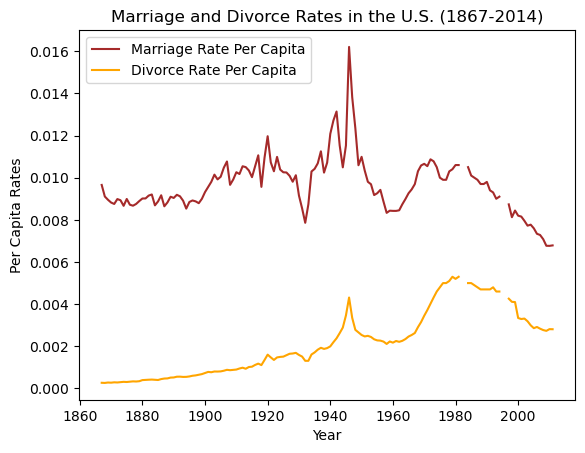

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading the data into a pandas dataframe
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Step 2: Setting the 'Year' column as the index
df = df.set_index('Year')

# Step 3: Calculating the marriage and divorce rates per capita. 
#Per capita is calculated by dividing the total number of marriages or divorces in U.S by its total population.
df['Marriage Rate'] = df['Marriages'] / df['Population']
df['Divorce Rate'] = df['Divorces'] / df['Population']

# Step 4: Creating the line plot
plt.plot(df.index, df['Marriage Rate'], label='Marriage Rate Per Capita', color='brown')
plt.plot(df.index, df['Divorce Rate'], label='Divorce Rate Per Capita', color='orange')

# Step 5: Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita Rates')
plt.title('Marriage and Divorce Rates in the U.S. (1867-2014)')
plt.legend()

# Step 6: Displaying the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 7 - Vertical Bar Chart </h3>

<i>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes! 

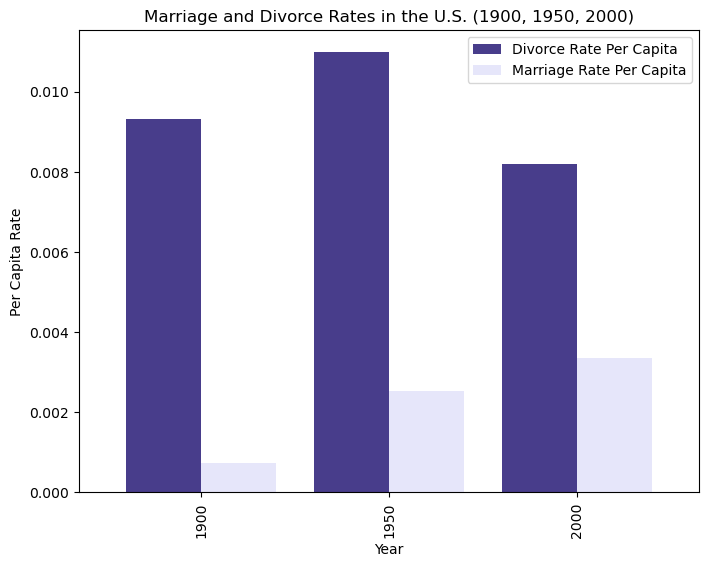

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading the data into a pandas dataframe
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Step 2: Extracting the rows corresponding to the years 1900, 1950, and 2000
df = df[df['Year'].isin([1900, 1950, 2000])]

# Step 3: Calculating the marriage and divorce rates per capita.
# Per capita is calculated by dividing the total number of marriages or divorces in U.S by its total population.
df['Marriage Rate'] = df['Marriages'] / df['Population']
df['Divorce Rate'] = df['Divorces'] / df['Population']

# Step 4: Creating the vertical bar chart
ax = df.plot(x='Year', y=['Marriage Rate', 'Divorce Rate'], kind='bar', width=0.8, figsize=(8, 6),color=['#483D8B', '#E6E6FA'])

# Step 5: Adding labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita Rate')
ax.set_title('Marriage and Divorce Rates in the U.S. (1900, 1950, 2000)')
ax.legend(['Divorce Rate Per Capita', 'Marriage Rate Per Capita'])

# Step 6: Displaying the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 8 - Horizontal Bar Chart </h3>

<i> Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

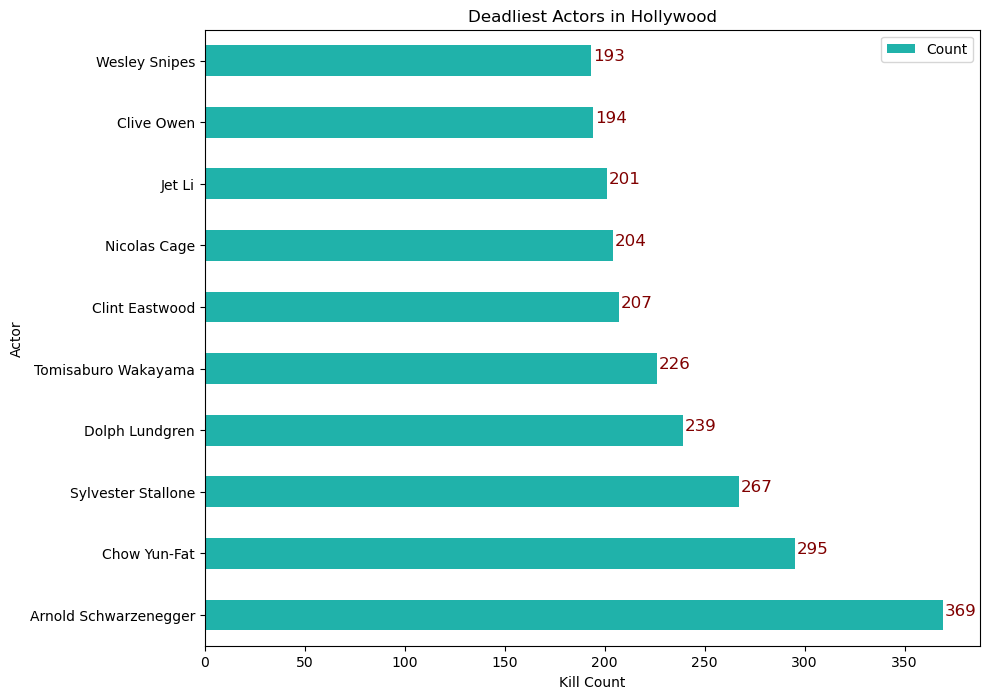

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading the data into a pandas dataframe
df = pd.read_csv("actor_kill_counts.csv")

# Step 2: Sorting the dataframe by 'Count' column in descending order
df = df.sort_values(by='Count', ascending=False)

# Step 3: Creating the horizontal bar chart
ax = df.plot(x='Actor', y='Count', kind='barh', figsize=(10,8), color='#20B2AA')

# Step 4: Adding labels to the chart
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood')

# Step 5: Labeling each bar with the corresponding actor's name
for i, v in enumerate(df['Count']):
    ax.text(v + 1, i, str(v), color='maroon', fontsize=12)

# Step 6: Displaying the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 9 - Pie Chart </h3>

<i>Create a pie chart showing the fraction of all Roman Emperors that were assassinated.  Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories. 

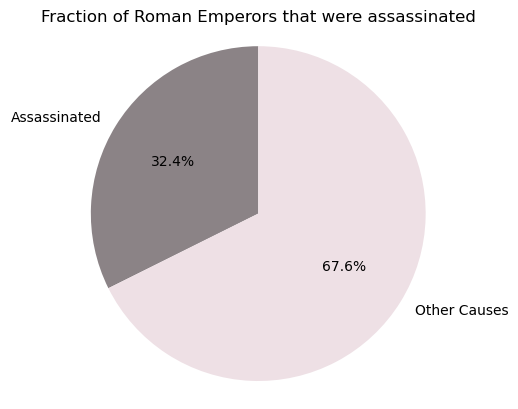

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loadig the data into a pandas dataframe
df = pd.read_csv("roman-emperor-reigns.csv")

# Step 2: Calculating the number of emperors that were assassinated and the number that were not
# this code ignores all other causes of death and only considers them as assasinated and not assassinated
assassinated = df[df['Cause_of_Death'] == 'Assassinated']['Emperor'].count()
not_assassinated = df[df['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Step 3: Creating the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated, not_assassinated]
colors = ['#8B8386', '#EEE0E5'] 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Step 4: Adding a title to the chart
plt.title('Fraction of Roman Emperors that were assassinated')

# Step 5: Displaying the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

<h3><font color='darkblue'>Question 10 - Scatter Plot </h3>

<i> Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.  Don't forget to label your axes! Color each dot according to its year. 

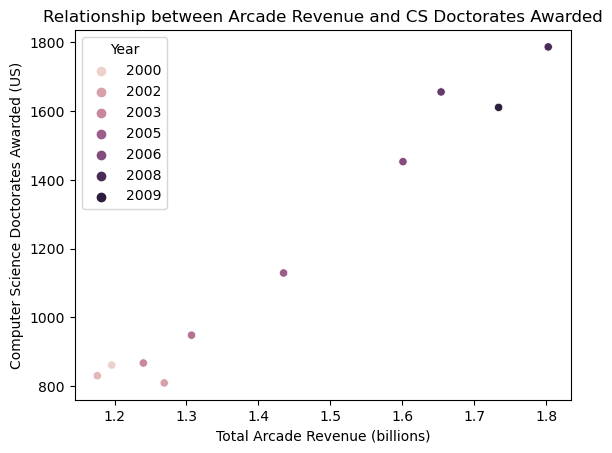

In [67]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Step 1: Load the data into a pandas dataframe
df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Step 2: Create the scatter plot
sb.scatterplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", data=df)

# Step 3: Add labels to the plot
plt.title("Relationship between Arcade Revenue and CS Doctorates Awarded")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

# Step 4: Display the plot
plt.show()


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------